# Notebook Model v.2 results vizualisations

## Content:
1. [Imports](#Imports)
2. [Read data](#Read_data)
3. [Modelling](#Modelling)
4. [Single player GUI](#Single_player_gui)


## Summary


## 1. Imports <a class="anchor" id="Imports"></a>

In [4]:
# Basics
import pandas as pd
import numpy as np

# Project module
import modules.helpers_lib as helper
import modules.viz_lib as viz
from modules.models_lib import create_PCA_scores, map_PCA_scores
from modules.config import dict_playingStyle_mapper


# Plotting
from matplotlib.figure import Figure

# gui
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import ipywidgets as widgets

# Ignore warnings
import warnings
warnings.simplefilter(action="ignore")

## 2. Read data <a class="anchor" id="Read_data"></a>

As inputs to the model there is the processed and filtered KPI-data found in the data directory. 
Note here that positions computed from the position detection model already exists in these imported .xlsx-files.

In [5]:
# Read model KPI dataframe from PL
df_KPI_PL = pd.read_excel('../data/model_kpis_PL21-22.xlsx')

# Read model KPI dataframe from Allsvenskan, Sweden
df_KPI_Swe = pd.read_excel('../data/model_kpis_Swe21.xlsx')

## 3. Modelling <a class="anchor" id="Modelling"></a>

Use the model presented in model_v2.ipynb and result mapping as in config.py.

In [6]:
# Get PCA-scores
dict_PCA_result = create_PCA_scores(df_KPI_PL, df_KPI_Swe, screeplot=False, nr_of_PCs=6)

# Result collecting
df_result_weights = dict_PCA_result['result_weights']
df_result_PCA_PL = dict_PCA_result['result_train']
df_result_PCA_PL_excl = dict_PCA_result['result_excl_train']
df_result_PCA_Swe = dict_PCA_result['result_test']
df_result_PCA_Swe_excl = dict_PCA_result['result_excl_test']

# Map scores to playingstyles
df_playing_styles_PL = map_PCA_scores(df_result_PCA_PL, df_result_PCA_PL_excl, dict_mapper=dict_playingStyle_mapper)
df_playing_styles_Swe = map_PCA_scores(df_result_PCA_Swe, df_result_PCA_Swe_excl, dict_mapper=dict_playingStyle_mapper)

## 4. Single player GUI <a class="anchor" id="Single_player_gui"></a>

### 4.1 Initiate and set variables

In [7]:
# Relative path to the Playmaker logo
logo_path="../figures_used/Playmaker_Logo.png"

# How many playingstyles for each position to include in plot
num_position_playingS = {'ST': 4, 'CM': 0, 'OW': 3, 'FB': 0, 'CB': 0}
#num_position_playingS_max = {'ST': 4, 'CM': 3, 'OW': 3, 'FB': 3, 'CB': 3}

# Parameterr to use if we want to have the spider as rankins in the league
use_ranking_scale = False

# Find all players
list_players_PL = df_playing_styles_PL['name'].unique().tolist()
list_players_PL.sort()
list_players_Swe = df_playing_styles_Swe['name'].unique().tolist()
list_players_Swe.sort()

# set league settings
list_players = list_players_PL
df_playing_styles = df_playing_styles_PL

### 4.2 Choose player

In [8]:
drop_down_player_list = widgets.Dropdown(
    options=list_players,
    #value='',
    description='Spelare:',
    disabled=False,
)
drop_down_player_list


Dropdown(description='Spelare:', options=('Aaron Cresswell', 'Aaron Lennon', 'Aaron Wan-Bissaka', 'Abdoulaye D…

### 4.3 Plot

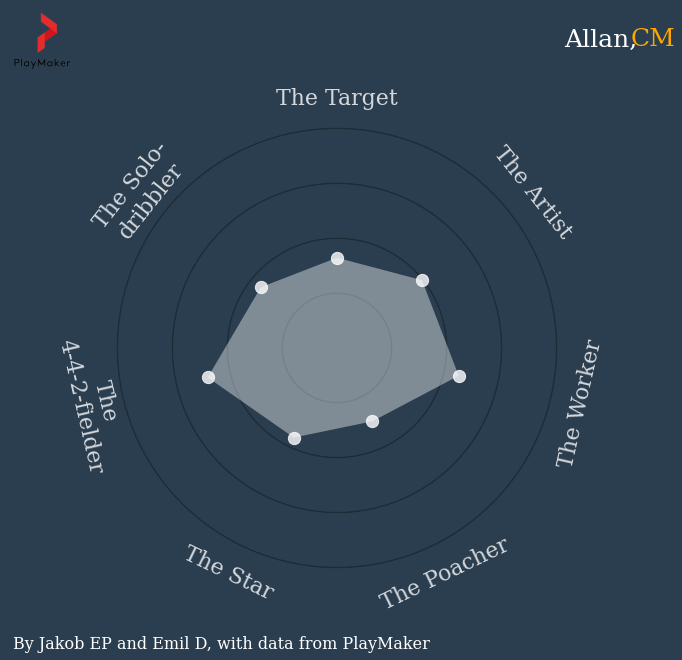

In [10]:
viz.single_player_notebook_plot(df_playing_styles, drop_down_player_list.value, num_position_playingS, use_ranking_scale, logo_path)